<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_2_11_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R-CODE 3.1 FITTING CW-OSL DATA WITH THE R-PACKAGE NUMOSL

Here we use the function `decomp` in the R package
`numOSL` by Peng et al. {2016}. This function allows
decomposition of a CW-OSL or LM-OSL decay curve into a given number
of first-order exponential components. The function uses a combination
of the differential evolution and Levenberg-Marquardt algorithms.

The function can analyze both CW-OSL and LM-OSL signals, and is called
according to: 


$\textbf{decomp}(Sigdata, delay.off = c(0,0), ncomp = 2, constant =
TRUE, typ =$"cw"$, control.args = list(), weight = FALSE, plot =
TRUE, log = $"x"$, lwd = 2, curve.no = NULL, SAR.Cycle = NULL, irr.dose
= NULL, outfile = NULL, transf = TRUE) $

where the options are:

$\textbf{Sigdata}$ matrix(required): a two-column matrix (i.e., stimulation
time and photon count values) 

$\textbf{delay.off}$ vector(with default): a two-element vector indicating
the $"Delay"$ and $"Off"$ values of the decay curves

$\textbf{ncomp}$ integer(with default): number of decomposed components
constant 

$\textbf{logical(with}$ default): logical value indicating if a constant
component should be subtracted from the decay curve 

$\textbf{typ}$ character(with default): type of a decay curve

$\textbf{control.args}$ list(with default): arguments used in the differential
evolution algorithm 

$\textbf{weight}$ logical(with default): logical value indicating if the
fit should be performed using a weighted procedure 

$\textbf{plot}$ logical(with default): logical value indicating if the results
should be plotted 

$\textbf{log}$ character(with default): a character string which contains
$"x"$ if the x axis is to be logarithmic, $"y"$ if the y axis is
to be logarithmic and $"xy"$ or $"yx"$ if both axes are to be logarithmic 

$\textbf{lwd}$ numeric(with default): width of curves (lines)


For a CW-OSL decay curve, the fitting model is \cite{Bluszcz and Adamiec, 2006}:

\begin{equation}
I(t)=a1*b1*exp(-b1*t)+...+ak*bk*exp(-bk*t),
\end{equation}

where $k=1,2,...$ indicates the exponential components, $I(t)$ is
the luminescence intensity as a function of time, $a$ is the number
of trapped electrons, and $b$ is the detrapping rate. A constant
component $c$ is added to this equation, if $constant=TRUE$ when
calling the `decomp` function. 

The following R-code shows how to analyze a CW-OSL curve into 2 exponential
components.

In [ ]:


install.packages("numOSL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘bdsmatrix’, ‘mvtnorm’, ‘RcppParallel’, ‘bbmle’, ‘DEoptim’, ‘lamW’, ‘matrixStats’, ‘minpack.lm’, ‘mclust’, ‘plotrix’, ‘Rcpp’, ‘shape’, ‘XML’, ‘zoo’, ‘RcppArmadillo’


Warning message in install.packages("Luminescence"):
“installation of package ‘bbmle’ had non-zero exit status”
Warning message in install.packages("Luminescence"):
“installation of package ‘lamW’ had non-zero exit status”


[1] Best fit parameters


,Ithn,seIthn,Lamda,seLamda
Comp.1,58289.77,657.5524,0.17560782,0.0016783100
Comp.2,83985.53,697.0941,0.02776211,0.0004630602



FOM= 7.719809

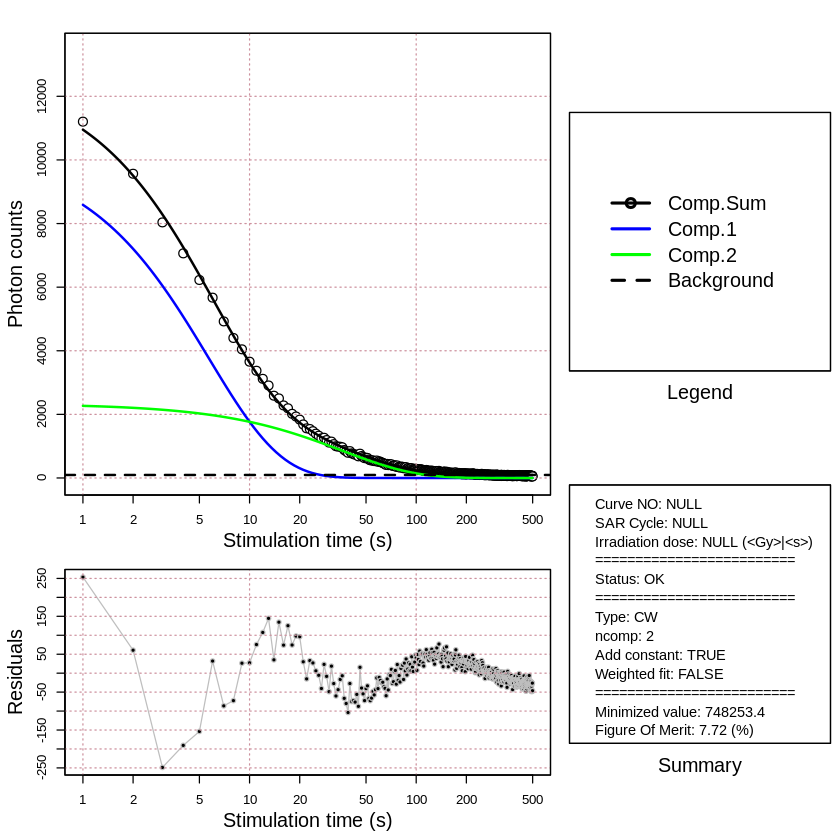

In [5]:
### Fitting CW-OSL signal with package numOSL (2 components)
# install R package tgcd by Peng et al.
library('numOSL')
# Load the data
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/KST4ph300IR.TXT"
data <-read.table(url(filename))

data<-data.frame(data[2:500,1],data[2:500,2]) #data t=1-500 s

a<- decomp(data, ncomp=2)
print.noquote("Best fit parameters")
a$LMpars
cat("\nFOM=",a$FOM)


# R-CODE 2.12 Fitting LM-OSL signals using the package numOSL

The decomp function previously discussed in this chapter for CW-OSL
signals, can also be used to analyze LM-OSL signals into first order
components.

For a LM-OSL decay curve, the fitting model is \cite{Bulur_2000}: 

\begin{equation}
I(t)=a1*b1*(t/P)*exp[-b1*t^{2}/(2*P)]+...+ak*bk*(t/P)*exp[-bk*t^{2}/(2*P)],
\end{equation}
where k=1, 2, ..., 7, and $I(t)$ is the luminescence intensity as
a function of time, $P$ is the total stimulation time, $a$ is the
number of trapped electrons, and $b$ is the detrapping rate. The
constant component for th LM-OSL signal is taken as $c(t/P)$ if $constant=TRUE$.
Parameters are initialized using the differential evolution method
\cite{BluszczAdamiec_2006,Adamiec_2004,Adamiec_2006}, then the Levenberg-Marquardt
algorithm is used to optimize the parameters. 


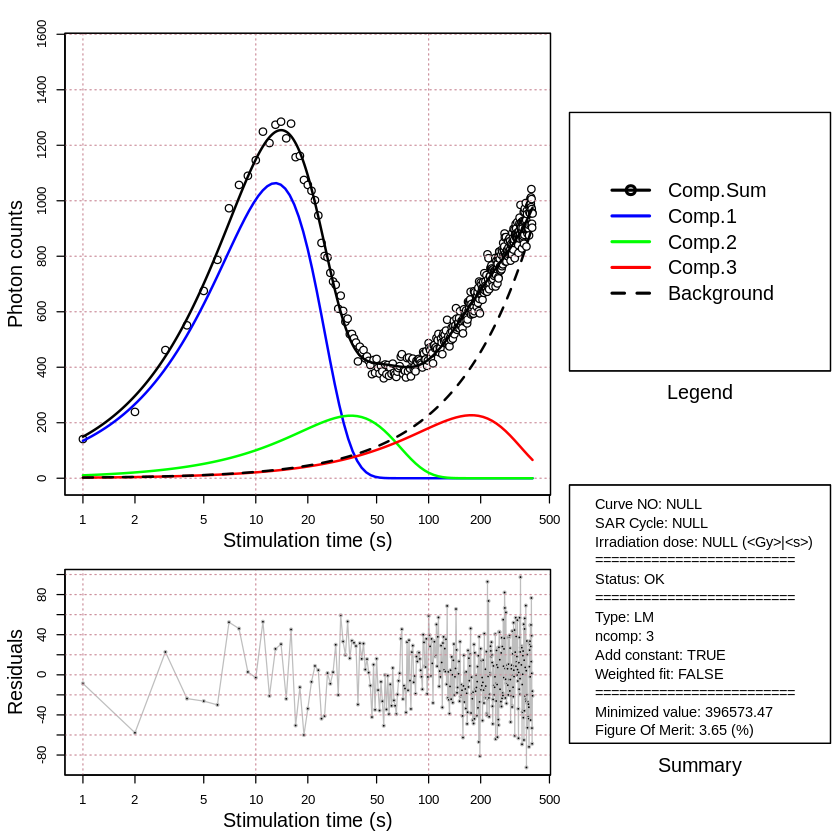

In [1]:
### Example 1: Analyze LM-OSL signal using package numOSL
rm(list=ls())
library("numOSL")
data(Signaldata)
decomp(Signaldata$lm,ncomp=3,typ="lm",
control.args=list(maxiter=10))

#FITTING 9-PEAK TL DATA WITH GENERAL ORDER KINETICS#

Kitis et al. {1998} developed
several new analytical expressions for use in CGCD analysis, by using
an approximation of the TL integral. In the case of general order
kinetics, these authors derived the following expression: 

\begin{equation}
I=I_{M}b^{\frac{b}{b-1}}exp\left(\frac{E}{kT}\frac{T-T_{M}}{T_{M}}\right)\left[Z_{M}+\left(b-1\right)\left(1-\Delta\right)\left(\frac{T^{2}}{T_{M}^{2}}exp\left(\frac{E}{kT}\frac{T-T_{M}}{T_{M}}\right)\right)\right]^{-\frac{b}{b-1}}
\end{equation}

 In this expression $b$ is the kinetic order of the TL process, $I_{M}$=maximum
intensity of the glow peak (in counts per K), $T_{M}$=temperature
at peak maximum (in K), $\Delta=2kT/E$ and $Z_{M}=1+(b-1)2kT_{M}/E$.

The advantage of using this equation to approximate the TL intensity
is that it involves two quantities which are measured experimentally,
namely the maximum TL intensity $(I_{M})$, and the corresponding
temperature ($T_{M}$). The activation energy $E$ is treated in this
expression and during the computerized fitting procedure as an adjustable
parameter. 

We use the R-package `tgcd` with the option of using general
order empirical equation. The four parameters
for the GOK model are: $I_{M}$ , $T_{M}$, $E$ and $b$. As discussed
previously, the package uses the Levenberg-Marquardt algorithm and
also supports constraining and/or fixing the parameters. 

The code consists of a call to the function `tgcd`, with the
specification model = $"g1"$ which refers to the GOK model. The data analyzed in this example are
obtained with the code line `data(RefGlow)`, and represent typical
TL glow curve for the well-known material LiF(TLD700).



[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),bValue(b)
1th-Peak,9819.598,1.236083,387.3209,1.024566
2th-Peak,21049.821,1.364918,428.2303,1.162317
3th-Peak,27490.957,2.109638,462.3064,1.940322
4th-Peak,51652.367,2.550174,488.1848,1.143498
5th-Peak,7244.932,1.329431,495.3013,1.000043
6th-Peak,5180.396,1.472240,523.3563,1.346305
7th-Peak,7238.703,2.068934,557.0965,1.258696
8th-Peak,1649.561,3.178659,585.6040,1.037189
9th-Peak,2323.920,2.245576,602.5491,2.000000


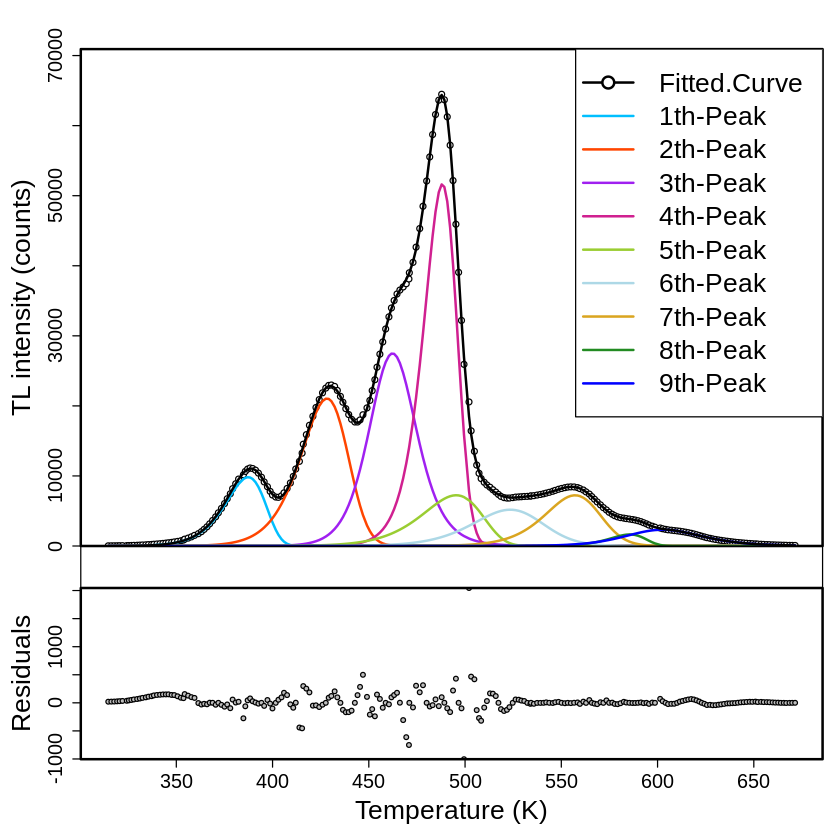

In [4]:
# Deconvolve TL signal using 9 peaks (no background subtraction)
# a GOK model using user-supplied initial kinetic parameters.
rm(list=ls())
library("tgcd")
data(Refglow)
knPars <-
  cbind(c(9824,21009,27792,50520,7153, 5496,6080,1641,2316), # Im
        c(1.24, 1.36, 2.10, 2.65, 1.43, 1.16, 2.48, 2.98, 2.25), # E
        c(387, 428, 462, 488, 493, 528, 559, 585, 602), # Tm
        c(1.02, 1.15, 1.99, 1.20, 1.28, 1.19, 1.40, 1.01, 1.18)) # b
invisible(capture.output(TL1 <- tgcd(Refglow$x009, npeak=9,
    model="g1",inisPAR=knPars, nstart=10, edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),aValue(a)
1th-Peak,10967.95,1.18269,490.341,0.0004814845


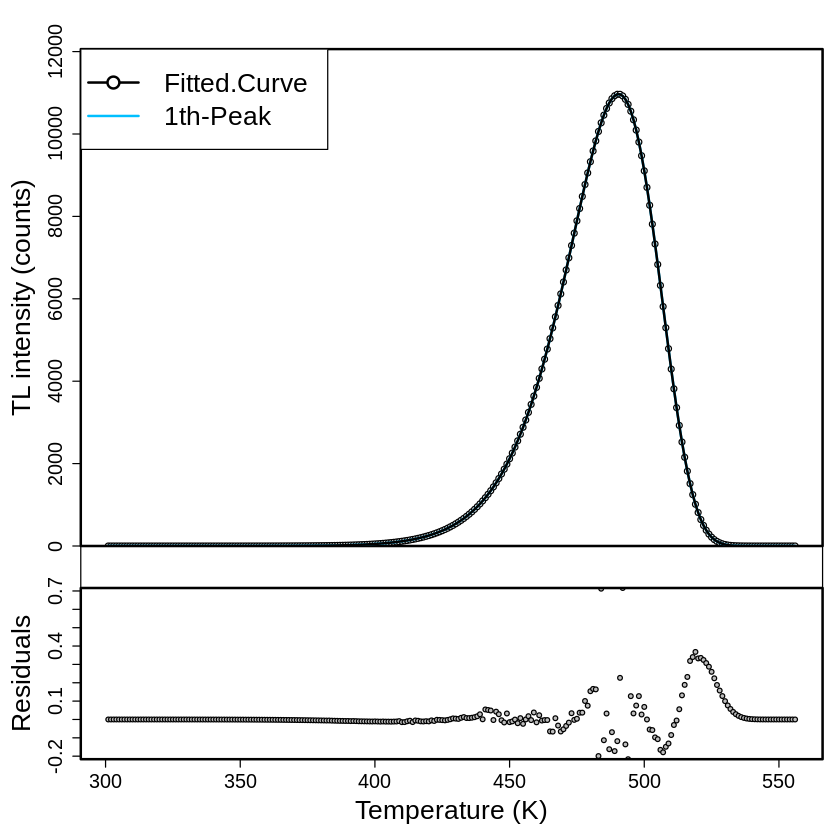

In [5]:
# Deconvolution of Reference GLOCANIN glow curve #1 with MOK 
rm(list=ls())
library("tgcd")
data(Refglow)
# Load the data.
# Deconvolve data with 1 peak using the MOK expression
startingPars <-
  cbind(c(15.0),  c(1.0), c(520), c(0.1)) # Im, E, Tm, R
invisible(capture.output(TL1 <- tgcd(Refglow$x001, npeak=1, 
                                     model="m1",inisPAR=startingPars, nstart=10, edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars